In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Introduction

First we'll load some dependencies into our Jupyter lab instance and print out the last date this notebook was run.

In [18]:
import datetime
import json
import rdflib
import requests
start = datetime.datetime.utcnow()
print(f"Started at {start}")
from fastai.tabular import *
import sys
sys.path.append("../src")
import data_loader
import data_prep

Started at 2020-09-17 20:04:14.391712


## Load RDF from Sinopia 
Download the zip exports from Sinopia's [Production](https://sinopia.io/exports), [Stage](https://stage.sinopia.io/exports), and [Development](https://development.sinopia.io/exports) environments.

We then call `data_loader.from_zipfile` function that returns a list of RDF graphs, one for each resource. For non-RDF fields, an error message is generated. 

In [3]:
help(data_loader.from_zipfile)

Help on function from_zipfile in module data_loader:

from_zipfile(zip_filepath: str) -> List
    Takes a zip filepath, extracts Sinopia RDF files, loading each JSON-LD
    into a rdflib.ConjunctionGraph, returns a list of these graphs.
    
    @param zip_filepath -- Path to zip files



In [4]:
print("Production Environment")
production = data_loader.from_zipfile("../../tmp/sinopia_prod.zip")
print("Stage Environment")
stage = data_loader.from_zipfile("../../tmp/sinopia_stage.zip")
print("Development Environment")
development = data_loader.from_zipfile("../../tmp/sinopia_dev.zip")

Production Environment
Failed to parse sinopia_export_all_2020-07-07T19:04:22.771Z/yale_2020-07-07T19:04:53.894Z/complete.log
Failed to parse sinopia_export_all_2020-07-07T19:04:22.771Z/chicago_2020-07-07T19:04:24.147Z/complete.log
Failed to parse sinopia_export_all_2020-07-07T19:04:22.771Z/minnesota_2020-07-07T19:04:51.773Z/complete.log
Failed to parse sinopia_export_all_2020-07-07T19:04:22.771Z/alberta_2020-07-07T19:04:25.458Z/complete.log
Failed to parse sinopia_export_all_2020-07-07T19:04:22.771Z/northwestern_2020-07-07T19:04:50.960Z/complete.log
Failed to parse sinopia_export_all_2020-07-07T19:04:22.771Z/nlm_2020-07-07T19:04:43.078Z/complete.log
Failed to parse sinopia_export_all_2020-07-07T19:04:22.771Z/penn_2020-07-07T19:04:53.790Z/complete.log
Failed to parse sinopia_export_all_2020-07-07T19:04:22.771Z/washington_2020-07-07T19:04:30.650Z/complete.log
Failed to parse sinopia_export_all_2020-07-07T19:04:22.771Z/pcc_2020-07-07T19:04:53.532Z/complete.log
Failed to parse sinopia_exp

In [5]:
print(f"Length of production: {len(production)}, stage: {len(stage)}, and development {len(development)}")

Length of production: 2725, stage: 4067, and development 192


In [8]:
print(f"Length of production: {len(production)}, stage: {len(stage)}, and development {len(development)}")

Length of production: 2774, stage: 4338, and development 192


## First Strategy Potential RDF Predicates as Data Frame Columns
The first strategy for creating a [Pandas Data Frame]() is defined in the `data_loader.to_dataframe` function that takes a list of RDF graphs and a Trellis URL of the environment's resource templates and returns a data frame.

In [9]:
help(data_loader.to_dataframe)

Help on function to_dataframe in module data_loader:

to_dataframe(graphs: List[dict], rt_url: str) -> pandas.core.frame.DataFrame
    Function takes a list of RDF graphs and a Trellis URL pointing the resource
    templates location
    
    @param graphs -- List of dictionaries with graph and group keys
    @param rt_url -- Trellis URL to environment's resource templates



How we create a data frame has significant implications for any machine learning classification tasks. Initially we will create three separate data frames, one for each environment, starting with production.

The current `data_loader.to_dataframe` function will only work as long the Trellis is available in each environment. 
When the upgrade to Sinopia `3.2.0` is complete with using MongoDB as datastore, we will need a different strategy to create the columns in the data frame. 

In [22]:
prod_df = data_loader.to_dataframe(production, 'https://trellis.sinopia.io/repository/ld4p')

Starting convert 2774 to dataframe at 2020-09-17 20:19:18.959154
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700.......
    Finished at 2020-09-17 20:24:04.560536 time 4.75 minutes for dataframe,
    size 2776


In [24]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Columns: 1064 entries, subject to http://id.loc.gov/ontologies/bibframe/historyOfWork
dtypes: float64(1060), int64(1), object(3)
memory usage: 22.5+ MB


In [13]:
prod_df.head()

,subject,resource_template,group,http://www.w3.org/1999/02/22-rdf-syntax-ns#value,http://id.loc.gov/ontologies/bibframe/qualifier,http://id.loc.gov/ontologies/bibframe/note,http://id.loc.gov/ontologies/bibframe/agent,http://id.loc.gov/ontologies/bibframe/role,http://www.w3.org/2000/01/rdf-schema#label,https://w3id.org/arm/core/ontology/0.1/atLocation,...,http://id.loc.gov/ontologies/bibframe/StockNumber,http://id.loc.gov/ontologies/bibframe/MusicPlate,http://id.loc.gov/ontologies/bibframe/MusicPublisherNumber,http://id.loc.gov/ontologies/bibframe/PublisherNumber,http://id.loc.gov/ontologies/bibframe/Strn,http://id.loc.gov/ontologies/bibframe/Upc,http://rdaregistry.info/Elements/m/P30304,http://www.stanford.edu,http://www.nytimes.com,http://www.loc.gov/mads/rdf/v1#FamilyName
0,https://trellis.sinopia.io/repository/nlm/9145...,nlm:RT:bf2:AdminMetadata,nlm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.sinopia.io/repository/minnesot...,ld4p:RT:bf2:Monograph:Item:Un-nested,minnesota,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://trellis.sinopia.io/repository/washingt...,WAU:RT:RDA:Work:etd,washington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://trellis.sinopia.io/repository/stanford...,stanford:RT:BF2:AdminMetadata,stanford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://trellis.sinopia.io/repository/chicago/...,UChicago:RT:bf2:Monograph:Instance,chicago,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
prod_df.tail()

,subject,resource_template,group,http://www.w3.org/1999/02/22-rdf-syntax-ns#value,http://id.loc.gov/ontologies/bibframe/qualifier,http://id.loc.gov/ontologies/bibframe/note,http://id.loc.gov/ontologies/bibframe/agent,http://id.loc.gov/ontologies/bibframe/role,http://www.w3.org/2000/01/rdf-schema#label,https://w3id.org/arm/core/ontology/0.1/atLocation,...,http://id.loc.gov/ontologies/bibframe/StockNumber,http://id.loc.gov/ontologies/bibframe/MusicPlate,http://id.loc.gov/ontologies/bibframe/MusicPublisherNumber,http://id.loc.gov/ontologies/bibframe/PublisherNumber,http://id.loc.gov/ontologies/bibframe/Strn,http://id.loc.gov/ontologies/bibframe/Upc,http://rdaregistry.info/Elements/m/P30304,http://www.stanford.edu,http://www.nytimes.com,http://www.loc.gov/mads/rdf/v1#FamilyName
2771,https://trellis.sinopia.io/repository/yale/76d...,Yale:RT:BF2:Series:Work:CtY-BR,yale,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2772,https://trellis.sinopia.io/repository/nlm/3ef7...,ld4p:RT:bf2:Monograph:Instance:Un-nested,nlm,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2773,https://trellis.sinopia.io/repository/alberta/...,ld4p:RT:bf2:Monograph:Instance:Un-nested,alberta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2774,https://trellis.sinopia.io/repository/washingt...,WAU:RT:RDA:Expression:map,washington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2775,https://trellis.sinopia.io/repository/washingt...,WAU:RT:RDA:Work:monograph,washington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
stage_df = data_loader.to_dataframe(stage, 'https://trellis.stage.sinopia.io/repository/ld4p')

Starting convert 4338 to dataframe at 2020-07-08 16:10:16.852423
Failed https://trellis.stage.sinopia.io/repository/ld4p/UNAM:RT:BF2:RetenciÃ³n status 404
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700..........2800..........2900..........3000..........3100..........3200..........3300..........3400..........3500..........3600..........3700..........3800..........3900..........4000..........4100..........4200..........4300...
    Finished at 2020-07-08 16:17:20.866243 time 7.066666666666666 minutes for dataframe,
    size 5768


In [16]:
stage_df.head()

,subject,resource_template,group,http://www.w3.org/1999/02/22-rdf-syntax-ns#value,http://id.loc.gov/ontologies/bibframe/source,http://id.loc.gov/ontologies/bibframe/note,http://www.w3.org/2000/01/rdf-schema#label,http://id.loc.gov/ontologies/bibframe/firstIssue,http://id.loc.gov/ontologies/bibframe/lastIssue,http://id.loc.gov/ontologies/bflc/target,...,http://rdaregistry.info/Elements/w/P10026,http://rdaregistry.info/Elements/w/P10333,http://rdaregistry.info/Elements/w/P10238,http://rdaregistry.info/Elements/w/P10376,http://rdaregistry.info/Elements/w/P10375,http://rdaregistry.info/Elements/w/P10106,http://rdaregistry.info/Elements/w/P10245,http://rdaregistry.info/Elements/w/P10244,http://rdaregistry.info/Elements/w/P10242,http://rdaregistry.info/Elements/w/P10240
0,https://trellis.stage.sinopia.io/repository/ta...,TAMU:RT:BF2:Monograph:Work:Un-nested,tamu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.stage.sinopia.io/repository/st...,ld4p:RT:bf2:Monograph:Work:Un-nested,stanford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://trellis.stage.sinopia.io/repository/pe...,ld4p:RT:bf2:Monograph:Item:Un-nested,penn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b8,ld4p:RT:bf2:Agent:Role,boulder,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://trellis.stage.sinopia.io/repository/ch...,ld4p:RT:bf2:Monograph:Work:Un-nested,chicago,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
stage_df.tail()

,subject,resource_template,group,http://www.w3.org/1999/02/22-rdf-syntax-ns#value,http://id.loc.gov/ontologies/bibframe/source,http://id.loc.gov/ontologies/bibframe/note,http://www.w3.org/2000/01/rdf-schema#label,http://id.loc.gov/ontologies/bibframe/firstIssue,http://id.loc.gov/ontologies/bibframe/lastIssue,http://id.loc.gov/ontologies/bflc/target,...,http://rdaregistry.info/Elements/w/P10026,http://rdaregistry.info/Elements/w/P10333,http://rdaregistry.info/Elements/w/P10238,http://rdaregistry.info/Elements/w/P10376,http://rdaregistry.info/Elements/w/P10375,http://rdaregistry.info/Elements/w/P10106,http://rdaregistry.info/Elements/w/P10245,http://rdaregistry.info/Elements/w/P10244,http://rdaregistry.info/Elements/w/P10242,http://rdaregistry.info/Elements/w/P10240
5763,b8,harvard:test2:resourceTemplate:bf2:Note,harvard,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5764,b5,harvard:test2:resourceTemplate:bf2:Note,harvard,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5765,https://trellis.stage.sinopia.io/repository/uc...,ld4p:RT:bf2:Serial:Work,ucsd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5766,https://trellis.stage.sinopia.io/repository/ta...,TAMU:RT:BF2:Monograph:Work:Un-nested,tamu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5767,b6,UNAM:RT:BF2:Agentes:Contribucion,yale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
len(prod_df.keys())

1061

In [19]:
len(stage_df.keys())

1543

In [21]:
prod_data = data_prep.databunch(prod_df)

/Users/jpnelson/2020/py3-env/lib/python3.8/site-packages/fastai-1.0.61.dev0-py3.8.egg/fastai/data_block.py:540: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
Yale:RT:BF2:Event:CtY, sinopia:resourceTemplate:bf2:WorkVariantTitle, PMO:RT:bf2:SoundRecording:Work, sinopia:resourceTemplate:bf2:Agents:RelatedAgents, ld4p:RT:bf2:RareMat:Item...
  if getattr(ds, 'warn', False): warn(ds.warn)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


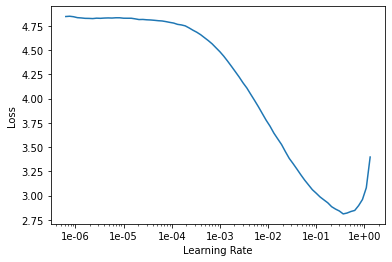

In [24]:
prod_learner = tabular_learner(prod_data, layers=[200,100], metrics=accuracy)
prod_learner.lr_find()
prod_learner.recorder.plot()

In [25]:
prod_learner.fit(3, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.293516,0.720138,0.747715,00:38
1,0.751519,0.731619,0.795247,00:38
2,0.435690,1.105663,0.762340,00:38


In [26]:
stage_data = data_prep.databunch(stage_df)

/Users/jpnelson/2020/py3-env/lib/python3.8/site-packages/fastai-1.0.61.dev0-py3.8.egg/fastai/data_block.py:540: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
stanford:RT:Agents:PrimaryContribution, ld4p:RT:bf2:ParallelTitle, UNAM:RT:BF2:Agentes:Jurisdiccion, sinopia:resourceTemplate:bf2:Item:Access, stanford:RT:BF2:Agent:Jurisdiction...
  if getattr(ds, 'warn', False): warn(ds.warn)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


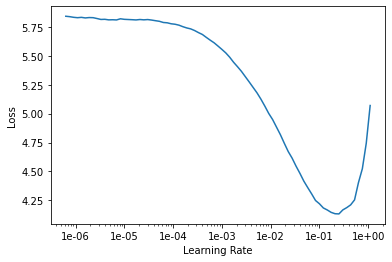

In [27]:
stage_learner = tabular_learner(stage_data, layers=[300,100], metrics=accuracy)
stage_learner.lr_find()
stage_learner.recorder.plot()

In [28]:
stage_learner.fit(3, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,2.076205,1.714460,0.589223,00:43
1,1.317170,1.851608,0.620141,00:42
2,0.888233,1.677389,0.642226,00:42


In [29]:
prod_learner.data.classes

['CornellSinatra45:Instance',
 'CornellSinatra45:Work',
 'PMO:RT:bf2:SoundRecording:Instance',
 'UAL:resourceTemplate:bf2:Monograph:Instance',
 'UAL:resourceTemplate:bf2:Monograph:Instance:Un-Nested',
 'UAL:resourceTemplate:bf2:Monograph:Item:Un-Nested',
 'UAL:resourceTemplate:bf2:Monograph:Opus',
 'UAL:resourceTemplate:bf2:Monograph:Opus:Un-Nested',
 'UAL:resourceTemplate:bf2:Monograph:Work',
 'UAL:resourceTemplate:bf2:Monograph:Work:Un-Nested',
 'UAL:resourceTemplate:bf2:Serial:Instance',
 'UAL:resourceTemplate:bf2:Serial:Item',
 'UAL:resourceTemplate:bf2:Serial:Opus:Un-Nested',
 'UAL:resourceTemplate:bf2:Serial:Work',
 'UCSD:RT:BF2:Monograph:Instance_OpenAccess:Un-nested',
 'UCSD:RT:BF2:Monograph:Item_OpenAccess_UnNested',
 'UCSD:RT:BF2:Monograph:Work:Un-nested',
 'UCSD:RT:BF2:NotatedMusic:Work:Un-nested',
 'UCSD:RT:BF2:NotatedMusicOnline:Instance_OpenAccess:Un-nested',
 'UChicago:RT:bf2:Monograph:Instance',
 'UChicago:RT:bf2:Monograph:Item',
 'UChicago:RT:bf2:Monograph:Work',
 'UMN

In [30]:
len(prod_data.classes)

106

In [31]:
len(stage_data.classes)

325

## Second Strategy - Actual RDF Predicates as Data Frame Columns

Instead of using all of the possible predicates contained in the resource templates, this version of `to_dataframe` only uses the existing 

In [32]:
def to_dataframe(graphs: List[dict]) -> pd.DataFrame:
    start = datetime.datetime.utcnow()
    print(f"Starting convert {len(graphs)} to dataframe at {start}")
    raw_data = []
    for i,row in enumerate(graphs):
        graph = row['graph']
        if not i%10:
            print(".", end="")
        if not i%100:
            print(f"{i}", end="")
        rt_query = graph.query(data_loader.SUBJ_RT)
        for subj, rt in rt_query:                
            subject = { 'subject': str(subj),
                        'group': row['group'],
                        'resource_template': str(rt) }
            for predicate in graph.predicates(subject=subj):
                pred_str = str(predicate)
                if pred_str in subject:
                    subject[pred_str] += 1
                else:
                    subject[pred_str] = 1
            raw_data.append(subject)
    end = datetime.datetime.utcnow()
    df = pd.DataFrame(data=raw_data).fillna(0).sample(frac=1).reset_index(drop=True)
    print(f"Finished at {end} total time {(end-start).seconds / 60.} minutes for dataframe, size {len(df)}")
    return df

In [33]:
prod2_df = to_dataframe(production)

Starting convert 2774 to dataframe at 2020-07-08 16:31:08.017530
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700.......Finished at 2020-07-08 16:31:19.978542 total time 0.18333333333333332 minutes for dataframe, size 2776


In [39]:
prod2_df.head()

,subject,group,resource_template,http://www.w3.org/ns/prov#wasGeneratedBy,http://purl.org/dc/terms/relation,http://id.loc.gov/ontologies/bibframe/adminMetadata,http://sinopia.io/vocabulary/hasResourceTemplate,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://id.loc.gov/ontologies/bibframe/identifiedBy,http://id.loc.gov/ontologies/bibframe/usageAndAccessPolicy,...,http://id.loc.gov/ontologies/bibframe/partNumber,http://id.loc.gov/ontologies/bibframe/mainTitle,http://id.loc.gov/ontologies/bibframe/partName,http://id.loc.gov/ontologies/bibframe/hasPart,http://id.loc.gov/ontologies/bibframe/soundCharacteristic,http://www.loc.gov/mads/rdf/v1#streetAddress,http://schema.org/identifier,http://schema.org/description,http://creativecommons.org/ns#License,http://id.loc.gov/ontologies/bibframe/musicSerialNumber
0,https://trellis.sinopia.io/repository/princeto...,princeton,ld4p:RT:bf2:Monograph:Work:Un-nested,2.0,0.0,0.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.sinopia.io/repository/alberta/...,alberta,UAL:resourceTemplate:bf2:Monograph:Work:Un-Nested,10.0,0.0,0.0,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://trellis.sinopia.io/repository/washingt...,washington,WAU:RT:RDA:Manifestation:monograph,4.0,0.0,1.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://trellis.sinopia.io/repository/yale/261...,yale,Yale:RT:BF2:Monograph:Work:CtY,3.0,0.0,1.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://trellis.sinopia.io/repository/yale/973...,yale,Yale:RT:BF2:Monograph:Instance:CtY,3.0,0.0,1.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
prod2_df.tail()

,subject,group,resource_template,http://www.w3.org/ns/prov#wasGeneratedBy,http://purl.org/dc/terms/relation,http://id.loc.gov/ontologies/bibframe/adminMetadata,http://sinopia.io/vocabulary/hasResourceTemplate,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://id.loc.gov/ontologies/bibframe/identifiedBy,http://id.loc.gov/ontologies/bibframe/usageAndAccessPolicy,...,http://id.loc.gov/ontologies/bibframe/partNumber,http://id.loc.gov/ontologies/bibframe/mainTitle,http://id.loc.gov/ontologies/bibframe/partName,http://id.loc.gov/ontologies/bibframe/hasPart,http://id.loc.gov/ontologies/bibframe/soundCharacteristic,http://www.loc.gov/mads/rdf/v1#streetAddress,http://schema.org/identifier,http://schema.org/description,http://creativecommons.org/ns#License,http://id.loc.gov/ontologies/bibframe/musicSerialNumber
2771,https://trellis.sinopia.io/repository/nlm/b3dc...,nlm,nlm:RT:bf2:AdminMetadata,1.0,0.0,0.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2772,https://trellis.sinopia.io/repository/yale/dac...,yale,Yale:RT:BF2:Monograph:SuperWork:CtY-BR,6.0,0.0,1.0,1,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2773,https://trellis.sinopia.io/repository/yale/d25...,yale,Yale:RT:BF2:Monograph:Work:CtY,1.0,0.0,1.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2774,https://trellis.sinopia.io/repository/washingt...,washington,WAU:RT:RDA:Manifestation:monograph,4.0,0.0,1.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2775,https://trellis.sinopia.io/repository/nlm/e1f7...,nlm,ld4p:RT:bf2:Monograph:Item:Un-nested,1.0,0.0,0.0,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
prod2_data = data_prep.databunch(prod2_df)

/Users/jpnelson/2020/py3-env/lib/python3.8/site-packages/fastai-1.0.61.dev0-py3.8.egg/fastai/data_block.py:540: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
sinopia:resourceTemplate:bf2:WorkVariantTitle, sinopia:resourceTemplate:bf2:Item:Access, sinopia:resourceTemplate:bf2:Agents:RelatedAgents, WAU:RT:RDA:Expression:eSerial, PMO:RT:bf2:SoundRecording:Instance...
  if getattr(ds, 'warn', False): warn(ds.warn)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


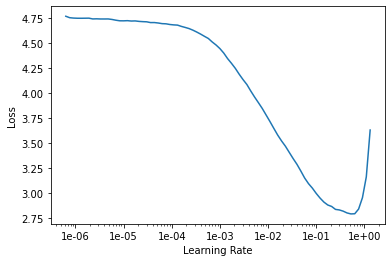

In [42]:
prod2_learner = tabular_learner(prod2_data, layers=[200,100], metrics=accuracy)
prod2_learner.lr_find()
prod2_learner.recorder.plot()

In [43]:
prod2_learner.fit(3, 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,1.657944,1.653837,0.566176,00:39
1,0.994056,1.749128,0.744485,00:38
2,0.684850,4.080927,0.748162,00:38


In [44]:
stage2_df = to_dataframe(stage)

Starting convert 4338 to dataframe at 2020-07-08 16:37:42.081883
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700..........2800..........2900..........3000..........3100..........3200..........3300..........3400..........3500..........3600..........3700..........3800..........3900..........4000..........4100..........4200..........4300...Finished at 2020-07-08 16:38:01.810459 total time 0.31666666666666665 minutes for dataframe, size 5768


In [45]:
stage2_df.head()

,subject,group,resource_template,http://www.w3.org/ns/prov#wasGeneratedBy,http://id.loc.gov/ontologies/bibframe/agent,http://sinopia.io/vocabulary/hasResourceTemplate,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://rdaregistry.info/Elements/w/P10223,http://id.loc.gov/ontologies/bibframe/originDate,http://id.loc.gov/ontologies/bibframe/content,...,http://rdaregistry.info/Elements/u/P60069,http://www.w3.org/2002/07/owl#sameAs,http://rdfs.org/ns/void#rootResource,http://id.loc.gov/ontologies/bibframe/Work,http://id.loc.gov/ontologies/bflc/relation,http://id.loc.gov/ontologies/bibframe/itemPortion,https://library.yale.edu/ld4p/terms/hasFirst,https://library.yale.edu/ld4p/terms/hasPart,http://id.loc.gov/ontologies/bibframe/ColorContent,http://id.loc.gov/ontologies/bibframe/acquisitionSource
0,https://trellis.stage.sinopia.io/repository/ta...,tamu,TAMU:RT:BF2:Monograph:Instance:Un-nested,4.0,0.0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.stage.sinopia.io/repository/ta...,tamu,TAMU:RT:BF2:Monograph:Instance,1.0,0.0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b8,boulder,ld4p:RT:bf2:Cartographic:ScaleNew,0.0,0.0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://trellis.stage.sinopia.io/repository/ya...,yale,Yale:RT:BF2:Monograph:Work:CtY-BR,1.0,0.0,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://trellis.stage.sinopia.io/repository/ta...,tamu,TAMU:RT:BF2:Monograph:Instance:Un-nested,3.0,0.0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
stage2_df.tail()

,subject,group,resource_template,http://www.w3.org/ns/prov#wasGeneratedBy,http://id.loc.gov/ontologies/bibframe/agent,http://sinopia.io/vocabulary/hasResourceTemplate,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://rdaregistry.info/Elements/w/P10223,http://id.loc.gov/ontologies/bibframe/originDate,http://id.loc.gov/ontologies/bibframe/content,...,http://rdaregistry.info/Elements/u/P60069,http://www.w3.org/2002/07/owl#sameAs,http://rdfs.org/ns/void#rootResource,http://id.loc.gov/ontologies/bibframe/Work,http://id.loc.gov/ontologies/bflc/relation,http://id.loc.gov/ontologies/bibframe/itemPortion,https://library.yale.edu/ld4p/terms/hasFirst,https://library.yale.edu/ld4p/terms/hasPart,http://id.loc.gov/ontologies/bibframe/ColorContent,http://id.loc.gov/ontologies/bibframe/acquisitionSource
5763,https://trellis.stage.sinopia.io/repository/pe...,penn,ld4p:RT:bf2:Monograph:Instance:Un-nested,2.0,0.0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5764,https://trellis.stage.sinopia.io/repository/nl...,nlm,ld4p:RT:bf2:Monograph:Instance:Un-nested,2.0,0.0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5765,https://trellis.stage.sinopia.io/repository/ya...,yale,Yale:RT:BF2:Monograph:Work:CtY,5.0,0.0,1,1,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5766,https://trellis.stage.sinopia.io/repository/st...,stanford,ld4p:RT:bf2:Monograph:Instance:Un-nested,3.0,0.0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5767,https://trellis.stage.sinopia.io/repository/ta...,tamu,TAMU:RT:BF2:Monograph:Work:Un-nested,1.0,0.0,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
stage2_data = data_prep.databunch(stage2_df)

/Users/jpnelson/2020/py3-env/lib/python3.8/site-packages/fastai-1.0.61.dev0-py3.8.egg/fastai/data_block.py:540: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
sinopia:resourceTemplate:bf2:LCC, sinopia:resourceTemplate:schema:Book, harvard:test2:resourceTemplate:bf2:SeriesInformation, blabla, sinopia:resourceTemplate:bflc:TranscribedTitle...
  if getattr(ds, 'warn', False): warn(ds.warn)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


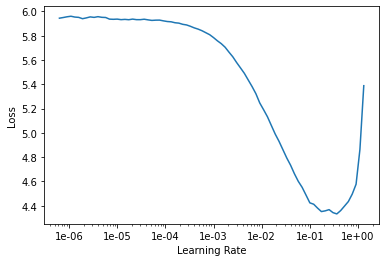

In [48]:
stage2_learner = tabular_learner(stage2_data, layers=[200,100], metrics=accuracy)
stage2_learner.lr_find()
stage2_learner.recorder.plot()

In [69]:
stage2_learner.fit(9, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,2.021183,1.396749,0.619797,00:03
1,1.369365,1.821088,0.643848,00:03
2,0.914967,1.562657,0.652174,00:03
3,0.686067,1.778111,0.651249,00:03
4,0.567388,1.639665,0.663275,00:03
5,0.474714,1.634118,0.667900,00:03
6,0.423930,1.665358,0.670675,00:03
7,0.396062,1.727719,0.679001,00:03
8,0.380531,1.727658,0.664200,00:03


In [49]:
stage2_learner.fit(3, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.977845,1.437292,0.664305,00:38
1,1.267954,1.623560,0.636847,00:38
2,0.894771,1.459532,0.688220,00:41


## Third Strategy - RDF Triples with Subject-Predicate-Object columns

In [103]:
def graph_triples_df(graph: rdflib.Graph, group: str) -> pd.DataFrame:
    data = [(str(s), str(p), str(o)) for s,p,o in graph.skolemize(authority=f"https://{graph.identifier}.sinopia.io//")]
    result = graph.query(data_loader.SUBJ_RT)
    if len(result.bindings) < 1:
        return # Doesn't try to return anything
    resource_template = str(graph.query(data_loader.SUBJ_RT).bindings[0]['resource_template'])
    df = pd.DataFrame(data=data, columns=['Subject', 'Predicate', 'Object'])
    df['resource_template'] = resource_template
    df['group'] = group
    return df

def all_triples(graphs: List[dict]):
    start = datetime.datetime.utcnow()
    print(f"Started at {start}")
    all_dataframes = []
    for i,row in enumerate(graphs):
        if not i % 10:
            print(".", end="")
        if not i % 100:
            print(f"{i}", end="")
        all_dataframes.append(graph_triples_df(row['graph'], row['group']))
    uber_df = pd.concat(all_dataframes)
    # Randomize triples in the master data frame
    uber_df.sample(frac=1).reset_index(drop=True)
    end = datetime.datetime.utcnow()
    print(f"{end} total size {len(uber_df)} in {(end-start).seconds / 60.}")
    return uber_df
        
        

In [90]:
prod2_triples_df = all_triples(production)

2020-06-26 20:25:09.135393
2020-06-26 20:26:27.594096 total size 146638


In [93]:
prod2_triples_df

,Subject,Predicate,Object,resource_template,group
0,https://Ne0bc8829e35648d4aac620d487a4c400.sino...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://www.w3.org/ns/activitystreams#Update,ld4p:RT:bf2:Monograph:Instance,ucdavis
1,https://Ne0bc8829e35648d4aac620d487a4c400.sino...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://id.loc.gov/ontologies/bibframe/Work,ld4p:RT:bf2:Monograph:Instance,ucdavis
2,https://trellis.sinopia.io/repository/ucdavis/...,http://id.loc.gov/ontologies/bibframe/title,https://Ne0bc8829e35648d4aac620d487a4c400.sino...,ld4p:RT:bf2:Monograph:Instance,ucdavis
3,https://trellis.sinopia.io/repository/ucdavis/...,http://sinopia.io/vocabulary/hasResourceTemplate,ld4p:RT:bf2:Monograph:Instance,ld4p:RT:bf2:Monograph:Instance,ucdavis
4,https://Ne0bc8829e35648d4aac620d487a4c400.sino...,http://id.loc.gov/ontologies/bibframe/mainTitle,万历东征,ld4p:RT:bf2:Monograph:Instance,ucdavis
...,...,...,...,...,...
14,http://id.loc.gov/vocabulary/menclvl/f,http://www.w3.org/2000/01/rdf-schema#label,full,nlm:RT:bf2:AdminMetadata,nlm
15,http://id.loc.gov/vocabulary/descriptionConven...,http://www.w3.org/2000/01/rdf-schema#label,RDA,nlm:RT:bf2:AdminMetadata,nlm
16,https://Ndcb46971a90045b8853ba90dd8764ebb.sino...,http://www.w3.org/ns/prov#atTime,2020-06-10T19:23:43.006000+00:00,nlm:RT:bf2:AdminMetadata,nlm
17,http://id.loc.gov/vocabulary/languages/eng,http://www.w3.org/2000/01/rdf-schema#label,English,nlm:RT:bf2:AdminMetadata,nlm


In [92]:
prod2_triples_df.tail()

,Subject,Predicate,Object,resource_template,group
14,http://id.loc.gov/vocabulary/menclvl/f,http://www.w3.org/2000/01/rdf-schema#label,full,nlm:RT:bf2:AdminMetadata,nlm
15,http://id.loc.gov/vocabulary/descriptionConven...,http://www.w3.org/2000/01/rdf-schema#label,RDA,nlm:RT:bf2:AdminMetadata,nlm
16,https://Ndcb46971a90045b8853ba90dd8764ebb.sino...,http://www.w3.org/ns/prov#atTime,2020-06-10T19:23:43.006000+00:00,nlm:RT:bf2:AdminMetadata,nlm
17,http://id.loc.gov/vocabulary/languages/eng,http://www.w3.org/2000/01/rdf-schema#label,English,nlm:RT:bf2:AdminMetadata,nlm
18,https://trellis.sinopia.io/repository/nlm/791b...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://id.loc.gov/ontologies/bibframe/AdminMet...,nlm:RT:bf2:AdminMetadata,nlm


In [99]:
from fastai.tabular import Categorify, DataBunch, TabularList # type: ignore

def triples_databunch(df: pd.DataFrame) -> DataBunch:
    category_names = ['Subject', 'Predicate', 'group']
    procedures = [Categorify]
    # Reserve last 20% of Data Frame for validation
    total = len(df)
    last_start = total - int(total*.2)
    test = TabularList.from_df(df[last_start:total].copy(),
                               cat_names=category_names)
    return (TabularList.from_df(df,
                                cat_names=category_names,
                                procs=procedures)
                       .split_by_idx(list(range(last_start, total)))
                       .label_from_df(cols='resource_template')
                       .add_test(test)
                       .databunch())

In [100]:
prod2_triples_data = triples_databunch(prod2_triples_df)

/home/jpnelson/ai-env/lib/python3.7/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
ld4p:RT:bf2:AdminMetadata, sinopia:resourceTemplate:bf2:Agent:bfPerson, ld4p:RT:bf2:WorkTitle, nlm:RT:bf2:AdminMetadata
  if getattr(ds, 'warn', False): warn(ds.warn)


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


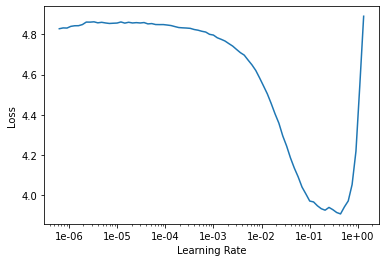

In [107]:
prod2_triples_learner = tabular_learner(prod2_triples_data, layers=[200,100], metrics=accuracy)
prod2_triples_learner.lr_find()
prod2_triples_learner.recorder.plot()

In [109]:
prod2_triples_learner.fit(3, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.303253,2.749107,0.336682,05:48
1,0.270115,3.754190,0.150416,05:51
2,0.244449,3.814091,0.296025,05:44


In [104]:
stage2_triples_df = all_triples(stage)

Started at 2020-06-26 20:45:12.005241
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700..........2800..........2900..........3000..........3100..........3200..........3300..........3400..........3500..........3600..........3700..........3800..........3900..........4000......2020-06-26 20:47:17.606290 total size 254586 in 2.0833333333333335


In [106]:
stage2_triples_data = triples_databunch(stage2_triples_df)

/home/jpnelson/ai-env/lib/python3.7/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
WAU:RT:RDA:Expression:monograph, ld4p:RT:bf2:NotatedMusic:Work, sinopia:resourceTemplate:schema:Book, WAU:RT:RDA:Expression:etd, test:rt:wikidata...
  if getattr(ds, 'warn', False): warn(ds.warn)


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


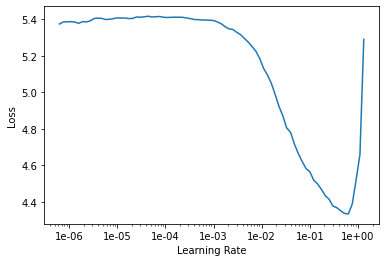

In [110]:
stage2_triples_learner = tabular_learner(stage2_triples_data, layers=[200,100], metrics=accuracy)
stage2_triples_learner.lr_find()
stage2_triples_learner.recorder.plot()

In [111]:
stage2_triples_learner.fit(3, 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.976790,2.973397,0.393081,18:57
1,1.016547,4.214326,0.426505,25:56
2,0.927489,3.584441,0.435812,25:53


## Using JSON-LD from Sinopia API

In [ ]:
resource_url = "https://api.stage.sinopia.io/resource/db9cb582-588f-4434-bfcf-2a4b309fda31"
result = requests.get(resource_url)
rdf_data = result.json().get('data')

In [19]:
resource_rdf = rdflib.Graph()
resource_rdf.parse(data=json.dumps(rdf_data).encode(), format='json-ld')

<Graph identifier=N91029a91805b4910b4d01ce4c4c0fa90 (<class 'rdflib.graph.Graph'>)>

In [23]:
len(resource_rdf)

48

In [ ]:
resource_df = data_loader.to_dataframe([resource_rdf],  )